In [451]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import umap
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler

In [452]:
df = pd.read_csv('data/lb_top250.csv')
df.head()

,Film_title,Release_year,Director,Cast,Average_rating,Owner_rating,Genres,Runtime,Countries,Original_language,...,★½,★★,★★½,★★★,★★★½,★★★★,★★★★½,★★★★★,Total_ratings,Film_URL
0,Harakiri,1962,Masaki Kobayashi,"['Tatsuya Nakadai', 'Akira Ishihama', 'Shima I...",4.68,5.0,"['History', 'Drama', 'Action']",135,['Japan'],Japanese,...,75,317,447,2110,4105,16631,23002,47628,94600,https://letterboxd.com/film/harakiri/
1,Come and See,1985,Elem Klimov,"['Aleksei Kravchenko', 'Olga Mironova', 'Liubo...",4.64,5.0,"['War', 'Drama']",142,['USSR'],Russian,...,456,1442,1670,5779,9168,33901,42554,120774,216927,https://letterboxd.com/film/come-and-see/
2,12 Angry Men,1957,Sidney Lumet,"['Martin Balsam', 'John Fiedler', 'Lee J. Cobb...",4.62,5.0,['Drama'],97,['USA'],English,...,484,2771,2725,17598,25137,108247,114339,282100,554887,https://letterboxd.com/film/12-angry-men/
3,Seven Samurai,1954,Akira Kurosawa,"['Toshirō Mifune', 'Takashi Shimura', 'Yoshio ...",4.60,5.0,"['Drama', 'Action']",207,['Japan'],Japanese,...,239,1187,1371,7491,11391,44056,43595,110118,219989,https://letterboxd.com/film/seven-samurai/
4,The Godfather: Part II,1974,Francis Ford Coppola,"['Al Pacino', 'Robert Duvall', 'Diane Keaton',...",4.59,5.0,"['Crime', 'Drama']",202,['USA'],English,...,559,3879,3633,23448,28400,114644,113064,336562,625904,https://letterboxd.com/film/the-godfather-part...


In [453]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Film_title         250 non-null    object 
 1   Release_year       250 non-null    int64  
 2   Director           250 non-null    object 
 3   Cast               250 non-null    object 
 4   Average_rating     250 non-null    float64
 5   Owner_rating       223 non-null    float64
 6   Genres             250 non-null    object 
 7   Runtime            250 non-null    int64  
 8   Countries          250 non-null    object 
 9   Original_language  250 non-null    object 
 10  Spoken_languages   250 non-null    object 
 11  Studios            250 non-null    object 
 12  Watches            250 non-null    int64  
 13  List_appearances   250 non-null    int64  
 14  Likes              250 non-null    int64  
 15  Fans               250 non-null    int64  
 16  ½                  250 non

In [454]:
# Standardize numerical columns
numerical_columns = ['Average_rating', 'Runtime', 'Fans', 'Watches', 'List_appearances', 'Likes', 'Total_ratings']

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
new_df = df[numerical_columns]

new_df.head()

,Average_rating,Runtime,Fans,Watches,List_appearances,Likes,Total_ratings
0,3.704518,-0.011653,-0.372940,-0.546071,-0.423030,-0.464215,-0.514259
1,3.288093,0.134010,-0.105391,-0.331399,0.114162,-0.273606,-0.264267
2,3.079880,-0.802394,0.665514,0.435493,0.671283,0.376832,0.426398
3,2.871668,1.486593,-0.196086,-0.247426,0.291722,-0.228902,-0.258010
4,2.767561,1.382548,0.438777,0.662109,0.880625,0.483161,0.571530


In [455]:
# Standardize categorical columns
categorical_columns = ['Genres', 'Countries']

for column in categorical_columns:
    df[column] = df[column].apply(ast.literal_eval)

    mlb = MultiLabelBinarizer()

    df_encoded = mlb.fit_transform(df[column])
    df_encoded_df = pd.DataFrame(df_encoded, columns=[f"{column}_{label}" for label in mlb.classes_])

    new_df = pd.concat([new_df, df_encoded_df], axis=1)

new_df.head()

,Average_rating,Runtime,Fans,Watches,List_appearances,Likes,Total_ratings,Genres_Action,Genres_Adventure,Genres_Animation,...,Countries_South Korea,Countries_Spain,Countries_Sweden,Countries_Switzerland,Countries_Taiwan,Countries_Turkey,Countries_UK,Countries_USA,Countries_USSR,Countries_Yugoslavia
0,3.704518,-0.011653,-0.372940,-0.546071,-0.423030,-0.464215,-0.514259,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.288093,0.134010,-0.105391,-0.331399,0.114162,-0.273606,-0.264267,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3.079880,-0.802394,0.665514,0.435493,0.671283,0.376832,0.426398,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2.871668,1.486593,-0.196086,-0.247426,0.291722,-0.228902,-0.258010,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.767561,1.382548,0.438777,0.662109,0.880625,0.483161,0.571530,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [458]:
new_df.columns

Index(['Average_rating', 'Runtime', 'Fans', 'Watches', 'List_appearances',
       'Likes', 'Total_ratings', 'Genres_Action', 'Genres_Adventure',
       'Genres_Animation', 'Genres_Comedy', 'Genres_Crime', 'Genres_Drama',
       'Genres_Family', 'Genres_Fantasy', 'Genres_History', 'Genres_Horror',
       'Genres_Music', 'Genres_Mystery', 'Genres_Romance',
       'Genres_Science Fiction', 'Genres_Thriller', 'Genres_War',
       'Genres_Western', 'Countries_Algeria', 'Countries_Argentina',
       'Countries_Australia', 'Countries_Austria', 'Countries_Belgium',
       'Countries_Brazil', 'Countries_Bulgaria', 'Countries_Canada',
       'Countries_China', 'Countries_Cuba', 'Countries_Czechia',
       'Countries_Czechoslovakia', 'Countries_Denmark', 'Countries_France',
       'Countries_Germany', 'Countries_Greece', 'Countries_Hong Kong',
       'Countries_Hungary', 'Countries_India', 'Countries_Iran',
       'Countries_Ireland', 'Countries_Italy', 'Countries_Japan',
       'Countries_Nether

In [456]:
# Fit UMAP and transform the data
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2)
umap_embedding = umap_model.fit_transform(new_df)

# Add UMAP results back to DataFrame
df['umap_1'] = umap_embedding[:, 0]
df['umap_2'] = umap_embedding[:, 1]

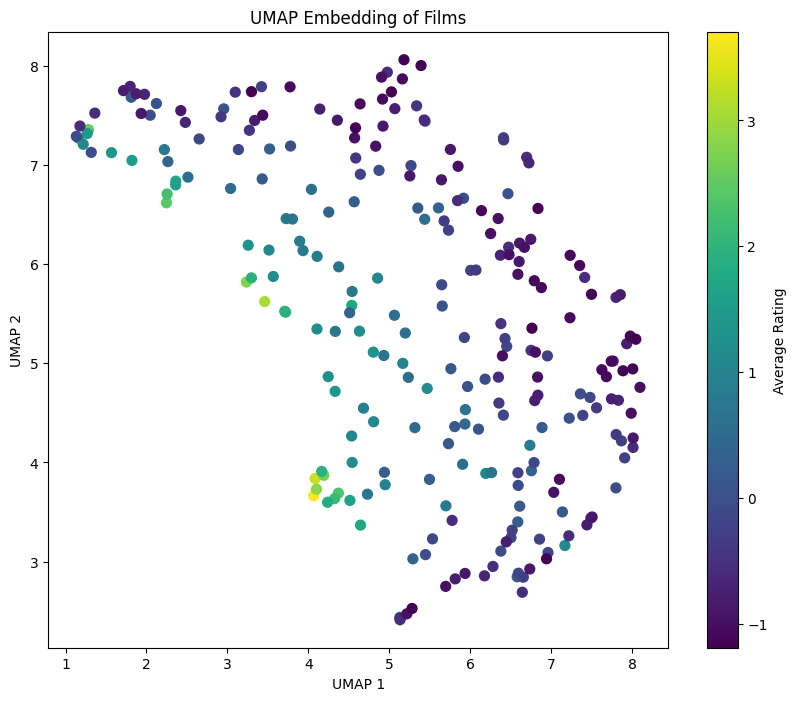

In [457]:
# Plot UMAP embedding
plt.figure(figsize=(10, 8))
plt.scatter(df['umap_1'], df['umap_2'], c=df['Average_rating'], cmap='viridis', s=50)
plt.colorbar(label='Average Rating')
plt.title('UMAP Embedding of Films')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.savefig('data/umap.png')
plt.show()